# Potresi

V projektni nalogi bom analizirala podatke o potresih od [tukaj](http://www.emsc-csem.org/) (European-Mediterranean Seismological Centre). Odločila sem se za potrese, ki so se zgodili v prvih dveh tednih oktobra (torej do 15. oktobra), ker da ta časovni okvir ravno pravšnje število podatkov - nekaj več kot 1300 potresov.

Na navedeni strani najdete podatke o zadnjih potresih po svetu (podatke sicer pridobivajo avtomatsko od približno 70 opazovalnic, ki so večinoma v Evropi, zaznajo pa seveda potrese z vsega sveta) - na primer čas potresa, lokacijo (v koordinatah in opisno), globino in magnitudo. Kdorkoli lahko prispeva komentar oziroma fotografijo, če je potres začutil ali opazil posledice (recimo razpoke na hiši). Za posamezen potres, ki je pritegnil vašo pozornost, lahko pridobite ogromno podatkov, ki pa jih na tem mestu ne bomo obravnavali, ker za analizo niso posebej zanimivi.

#### Opomba

Če vas potresi zelo zanimajo, si oglejte tudi [to projektno nalogo](https://github.com/TinaKrasovec/Potresi-po-Evropi-zadnjih-nekaj-let-z-magnitudo-4). Podobnost je naključna, poskusili pa sva delati tako, da se analiza ne prekriva preveč. Pri delu nisva sodelovali.

## Uvod
Naložimo csv datoteko in si ogledamo nekaj vrstic za občutek.

In [244]:
import pandas as pd
pd.options.display.max_rows = 15


%matplotlib inline

In [2]:
podatki = pd.read_csv('potresi_koncni.csv', index_col = 'id')

In [3]:
podatki[:7]

,leto,mesec,dan,ura,minuta,sekunda,DOL,dolzina,SIR,sirina,globina,magnituda,regija
id,,,,,,,,,,,,,
537411,2016,10,15,23,40,55.1,E,34.31,N,38.13,4,2.7,CENTRAL TURKEY
537458,2016,10,15,23,17,42.6,E,27.72,N,38.93,6,2.6,WESTERN TURKEY
537380,2016,10,15,23,6,59.1,E,20.69,N,39.76,15,4.3,GREECE
537552,2016,10,15,22,43,13.2,E,38.94,N,19.21,8,3.6,WESTERN TURKEY
537310,2016,10,15,22,30,26.1,E,71.70,N,41.26,15,3.7,EASTERN UZBEKISTAN
537551,2016,10,15,22,27,50.9,E,38.94,N,19.29,8,3.6,WESTERN TURKEY
537553,2016,10,15,22,19,42.0,E,39.75,N,59.75,12,2.6,GREECE


## Kje so se zgodili potresi?

Večkrat smo že slišali, da živimo na potresno zelo živahnem območju. Izkaže pa se, da se v smislu potresov v začetku oktobra v Sloveniji ni veliko zgodilo. Opazovalnice so zabeležile en sam potres na našem območju, zato se najbrž spodobi, da ga izpišemo.

In [42]:
podatki[podatki.regija == 'SLOVENIA']

,leto,mesec,dan,ura,minuta,sekunda,DOL,dolzina,SIR,sirina,globina,magnituda,regija
id,,,,,,,,,,,,,
536262,2016,10,10,11,43,41.6,E,14.59,N,45.94,2,2.0,SLOVENIA


In [142]:
podatki.loc[536262]

leto                               2016
mesec                                10
dan                                  10
ura                                  11
minuta                               43
sekunda                            41.6
DOL                                   E
dolzina                           14.59
SIR                                   N
sirina                            45.94
globina                               2
magnituda                             2
regija                         SLOVENIA
test         <zip object at 0x03723968>
drzava                         SLOVENIA
Name: 536262, dtype: object

Kako zanimivo! Potres se je zgodil v ponedeljek, 10. oktobra ob 11:43, ko so potekale vaje za programiranje.

V katerih državah pa se je zgodilo največ potresov?

In [254]:
stevilo_regije = podatki['regija'].value_counts()
stevilo_regije

WESTERN TURKEY                   242
GREECE                            69
CENTRAL TURKEY                    65
OKLAHOMA                          58
EASTERN TURKEY                    57
VIRGIN ISLANDS REGION             56
CENTRAL ITALY                     54
                                ... 
LIGURIAN SEA                       1
SOUTHERN XINJIANG, CHINA           1
WESTERN XIZANG                     1
PYRENEES                           1
OLYMPIC PENINSULA, WASHINGTON      1
SOUTHERN QUEBEC, CANADA            1
WESTERN IRAN                       1
Name: regija, dtype: int64

Turčija je očitno potresno zelo zanimiva država, saj med prvimi petimi regijami nastopi kar trikrat s skupno več kot 350 potresi. Presenetljivo torej že zelo površen pregled pokaže, da se je približno vsak četrti potres zgodil v Turčiji.

Opazimo pa tudi težavo. Sklepali bi, da so potresno aktivna območja deljena v manjše regije (kot zgoraj Turčija in recimo Čile) zato, da tisti, ki se s tem ukvarjajo, že na prvi pogled bolj natančno vedo, kje je bil potres. Recimo pa, da nas ne zanima, v katerem delu države se je potres zgodil, ampak samo država, ker bodo v tem primeru podatki preglednejši.

### Funkcija, ki regijo spremeni v državo

Spodnja funkcija iz regije približno naredi državo (tabeli dodamo stolpec "drzava"). Zakaj samo približno? Ime regije je zapisano v več oblikah in manjšinski del teh opisov funkcija ohrani, čeprav niso idealni. Spodaj je za vsako obliko napisano, kaj funkcija pretvori_v_drzavo z njo naredi:

- imenovanje regije s stranmi neba (zahodna, osrednja ...): V tem primeru ohranimo samo ime države
- zapis oblike 'mesto/pokrajina, država': V tem primeru zbrišemo vse pred vejico
- širše območje neke države (predpostavljam, da gre za otočja), npr 'FIJI REGION': ohranimo samo ime države
- zaradi neznanega razloga je Kalifornija včasih imenovana 'CALIF.' (pri drugih državah tega nisem opazila): Spremenimo v 'CALIFORNIA'
- območje na morju ('OFFSHORE ...' ali 'NEAR THE COAST OF ...'): Izbrišemo opis območja

En opis, ki ga nisem popravljala, je recimo mejno območje med dvema državama (kot recimo 'CHINA-LAOS BORDER REG'). Dobiti stoplec, ki bi vseboval izključno samo države, pa je iz teh podatkov skoraj nemogoče. Ena izmed regij, kot vidimo zgoraj, so npr. Pireneji, gorovje med Španijo in Francijo. Tega ne moremo popraviti z nobeno funkcijo.

In [250]:
def pretvori_v_drzavo(reg):
    odvec = {'WESTERN': 8, 'EASTERN': 8, 'CENTRAL': 8, 'SOUTHER': 9, 'NORTHER': 9, 'OFFSHOR' : 9, 'NEAR TH' : 18}
    zacetek = reg[:7]
    
    if ', ' in reg:
        vejica = reg.index(',')
        nova_regija = reg[vejica + 2:]
        return pretvori_v_drzavo(nova_regija)
    elif reg[-7:] == ' REGION':
        nova_regija = reg[:-7]
        return pretvori_v_drzavo(nova_regija)
    elif zacetek in odvec:
        nova_regija = reg[odvec[zacetek]:]
        return pretvori_v_drzavo(nova_regija)
    elif reg[-7:] == 'CALIF.':
        return 'CALIFORNIA'
    else:
        return reg

In [251]:
podatki['drzava'] = podatki['regija'].map(pretvori_v_drzavo)
podatki[:7]

,leto,mesec,dan,ura,minuta,sekunda,DOL,dolzina,SIR,sirina,globina,magnituda,regija,test,drzava
id,,,,,,,,,,,,,,,
537411,2016,10,15,23,40,55.1,E,34.31,N,38.13,4,2.7,CENTRAL TURKEY,<zip object at 0x03723968>,TURKEY
537458,2016,10,15,23,17,42.6,E,27.72,N,38.93,6,2.6,WESTERN TURKEY,<zip object at 0x03723968>,TURKEY
537380,2016,10,15,23,6,59.1,E,20.69,N,39.76,15,4.3,GREECE,<zip object at 0x03723968>,GREECE
537552,2016,10,15,22,43,13.2,E,38.94,N,19.21,8,3.6,WESTERN TURKEY,<zip object at 0x03723968>,TURKEY
537310,2016,10,15,22,30,26.1,E,71.70,N,41.26,15,3.7,EASTERN UZBEKISTAN,<zip object at 0x03723968>,UZBEKISTAN
537551,2016,10,15,22,27,50.9,E,38.94,N,19.29,8,3.6,WESTERN TURKEY,<zip object at 0x03723968>,TURKEY
537553,2016,10,15,22,19,42.0,E,39.75,N,59.75,12,2.6,GREECE,<zip object at 0x03723968>,GREECE


Izpišimo torej število potresov glede na novi stolpec 'drzava' in se prepričajmo, da je bilo pisanje funkcije in dodajanje stoplca smiselno. Res, vrh seznama se opazno spremeni, čeprav Turčija ostaja daleč pred ostalimi državami. Za prvih 20 držav bomo spodaj izrisali tudi graf.

In [258]:
stevilo_drzava = podatki['drzava'].value_counts()
stevilo_drzava

TURKEY                           379
CHILE                            165
GREECE                           132
PUERTO RICO                       62
ITALY                             61
OKLAHOMA                          59
VIRGIN ISLANDS                    56
                                ... 
SYRIA                              1
LEEWARD ISLANDS                    1
BULGARIA                           1
AZORES-CAPE ST. VINCENT RIDGE      1
EL SALVADOR                        1
SOUTHEAST OF EASTER ISLAND         1
PAKISTAN                           1
Name: drzava, dtype: int64

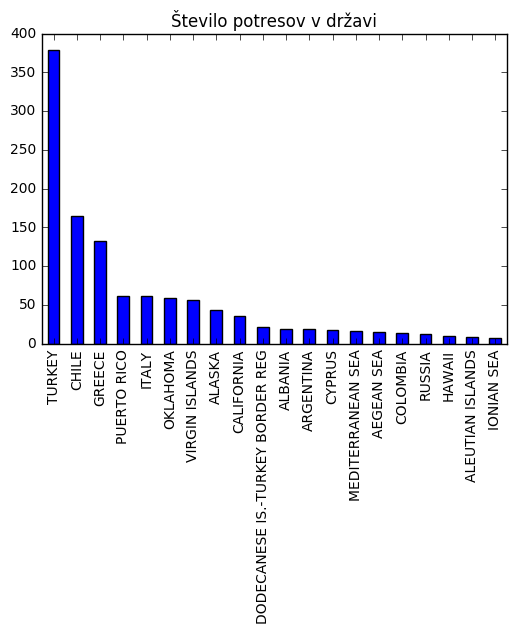

In [283]:
stevilo_drzava.head(20).plot(kind='bar', title='Število potresov v državi')

Izpišimo potrese z največjo magnitudo, saj nas ta podatek običajno zelo zanima. Najprej izpišimo posamezne najmočnejše potrese, ki so se zgodili v prvi polovici oktobra. Zanimivo je, da Turčije na vrhu seznama ne najdemo (za razliko od Grčije in Čila). Sklepamo torej, da bi bilo potrebno pogledati tudi tabelo s povprečno magnitudo, ki jo bomo izpisali spodaj.

In [280]:
delno = podatki[['regija', 'drzava', 'magnituda']]
delno.sort_values('magnituda', ascending=False)[:15]

,regija,drzava,magnituda
id,,,
535107,"BONIN ISLANDS, JAPAN REGION",JAPAN,5.7
535361,"LUZON, PHILIPPINES",PHILIPPINES,5.7
537318,GREECE,GREECE,5.4
536858,SOUTHEAST OF EASTER ISLAND,SOUTHEAST OF EASTER ISLAND,5.4
534540,PAKISTAN,PAKISTAN,5.3
536551,"MINDORO, PHILIPPINES",PHILIPPINES,5.3
537149,BLACK SEA,BLACK SEA,5.2
534884,"NORTHERN SUMATRA, INDONESIA",INDONESIA,5.0
535942,SAMOA ISLANDS REGION,SAMOA ISLANDS,5.0


Sedaj si oglejmo še povprečne magnitude. Opazimo, da se pojavijo mnoge države iz zgornje tabele. Kako bi si to razložili?

Na rezultate gotovo vpliva relativno majhno skupno število podatkov in izredno velik razpon v številu podatkov za posamezno državo. Zato teh povprečnih vrednosti ne smemo jemati preresno. Opozorila bi recimo na primer Pakistana. Očitno se je tam v opazovanem času zgodil le en potres (tabela stevilo_drzava zgoraj), ki pa je bil izredno močan (magnituda 5.3 v zgornji tabeli). S primerjavo tabel nad in pod tem besediom vidimo, da se je v mnogih državah zgodil le en močan potres, tako da težko govorimo o verodostojni povprečni vrednosti.

In [261]:
drzave = podatki.groupby('drzava')
drzave['magnituda'].mean().sort_values(ascending=False)[:15]

drzava
SOUTHEAST OF EASTER ISLAND    5.400000
PAKISTAN                      5.300000
BLACK SEA                     5.200000
PHILIPPINES                   5.166667
SOUTH SANDWICH ISLANDS        5.000000
SAMOA ISLANDS                 5.000000
WEST CHILE RISE               5.000000
INDONESIA                     5.000000
JAPAN                         4.950000
SANTA CRUZ ISLANDS            4.900000
PERU                          4.900000
NORTH ATLANTIC OCEAN          4.900000
SOUTHWEST INDIAN RIDGE        4.800000
FIJI                          4.750000
VANUATU                       4.700000
Name: magnituda, dtype: float64

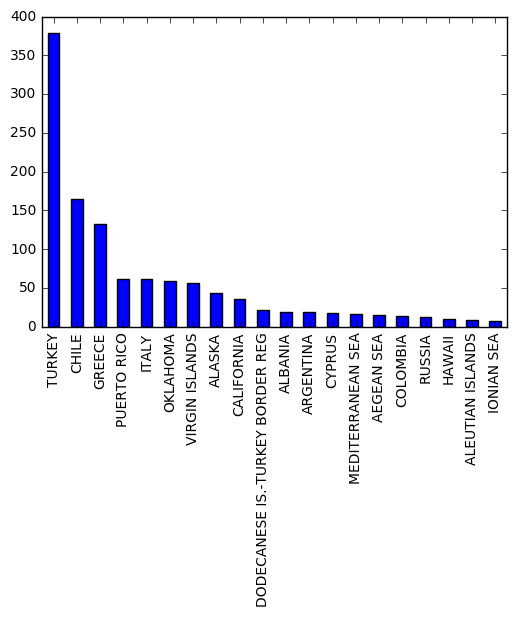

In [ ]:
po_dnevu = podatki.groupby('dan')
po_dnevu.size().plot(kind='bar')

In [ ]:
podatki.groupby('ura')['magnituda'].mean().plot()

NameError: name 'regije' is not defined

Opazimo razliko med [18] in [19], hipoteza morje - kopno...

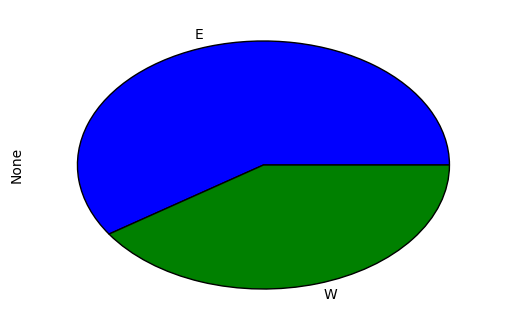

In [6]:
dolzina = podatki.groupby('DOL')
dolzina.size().plot(kind = 'pie')

In [16]:
sirina = podatki.groupby('SIR')
#sirina['magnituda'].mean()
#sirina.size().plot(kind = 'pie')

zanimivo. opazovalnice, Afrika, morje...?

In [ ]:
globina = podatki.groupby('globina')
globina.size().plot()

In [24]:
#podatki.groupby('globina')['magnituda'].mean().plot()
#podatki.groupby('globina')['magnituda'].value_counts().plot()
#podatki.groupby('globina')['magnituda'].size().plot()

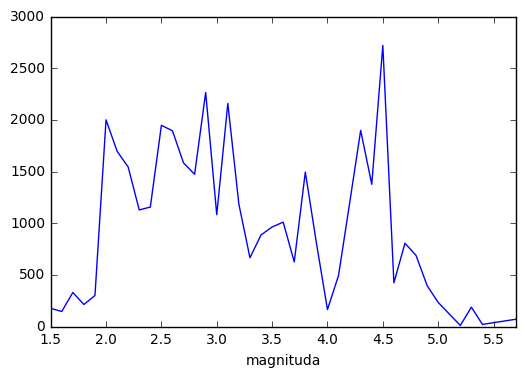

In [26]:
podatki.groupby('magnituda')['globina'].sum().plot()

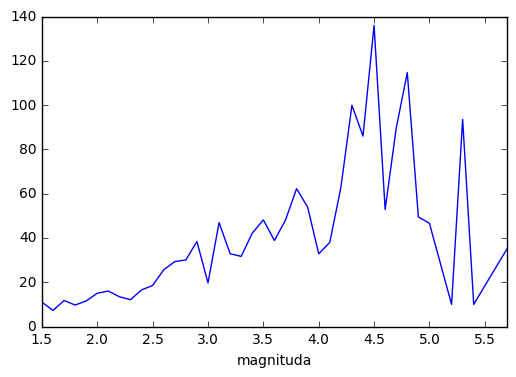

In [25]:
podatki.groupby('magnituda')['globina'].mean().plot()